In [ ]:
#40. Importing Data Into Python 

In [1]:
import pandas as pd

In [ ]:
#Method 1: Specify Full Path To File

In [2]:
#Windows:
stats = pd.read_csv('C:\\Users\\shimi\\OneDrive\\Documents\\Udemy\\Udemy_Python-For-Data-Science\\Python A-Z™ - Python For Data Science With Real Exercises!\\05 - Data Frames\\P4-Demographic-Data.csv')
#stats = pd.read_csv('P4-Demographic-Data.csv')

In [ ]:
stats

In [ ]:
#Method 2: Change Working Directory

In [3]:
import os

In [4]:
print(os.getcwd())

C:\Users\shimi\OneDrive\Documents\Udemy\Udemy_Python-For-Data-Science\Python A-Z™ - Python For Data Science With Real Exercises!\05 - Data Frames


In [ ]:
#Windows
#os.chdir('C:\\Users\\shimi\\OneDrive\\Área de Trabalho')  #Changing of working directory
os.chdir('C:\\Users\\shimi\\OneDrive\\Documents\\Udemy\\Udemy_Python-For-Data-Science\\Python A-Z™ - Python For Data Science With Real Exercises!\\05 - Data Frames')

In [ ]:
stats2 = pd.read_csv('P4-Demographic-Data.csv')

In [ ]:
stats2

In [ ]:
#41. Exploring your dataset

In [ ]:
#1. Full dataframe
stats

In [ ]:
#2. Number of rows
len(stats) #195 rows imported

In [ ]:
#3. See columns
stats.columns

In [ ]:
#4. Number of columns
len(stats.columns)

In [ ]:
#5. Top rows
stats.head(6) #remember the parentheses

In [ ]:
#6. Bottom rows
stats.tail(6)

In [ ]:
#7. Information on the columns
stats.info() #like the str() function in R

In [ ]:
#8. Get stats on the columns
stats.describe() #like summary() in R

In [ ]:
stats.describe().transpose()

In [ ]:
#42. Renaming Columns of a Dataframe

In [ ]:
stats.head()

In [ ]:
stats.columns

In [5]:
stats.columns = ['CountryName', 'CountryCode', 'BirthRate', 'InternetUsers', 'IncomeGroup']

In [ ]:
#43. Subsetting Data Frames in Pandas

In [ ]:
stats.head()

In [ ]:
#Three parts
# -Rows
# -Columns
# -Combine the two

In [ ]:
#Part 1. Rows

stats[2:4]

In [ ]:
#Quick exercise (refresher)
#Reverse the data frame

stats[::-1]

In [ ]:
#Quick exercise (refresher)
#Get ONLY every 20th row

stats[::20]

In [ ]:
#Part 2. Columns

In [ ]:
stats['CountryName'].head()

In [ ]:
stats[['BirthRate', 'CountryName']].head()

#In R you'd be passing a Vector: c('CountryName', 'BirthRate')

In [ ]:
#Quick Acces - requires the name to be one word

In [ ]:
stats.BirthRate.head()

In [ ]:
#Part 3. Combine the two

In [ ]:
stats[4:8][['BirthRate', 'CountryName']]

In [ ]:
stats[['CountryName', 'BirthRate']][4:8]

In [ ]:
#Two subsettings are being made

In [ ]:
df1 = stats[4:8]
df1[['CountryName', 'BirthRate']]

In [ ]:
df2 = stats[['CountryName', 'BirthRate']]
df2[4:8]

In [ ]:
#44. Basic Operations with a Data Frame

In [ ]:
stats[['CountryName', 'BirthRate', 'InternetUsers']][3:9]

In [ ]:
#Mathematical operations:

result = stats.BirthRate * stats.InternetUsers
result.head()

In [ ]:
#Add column:

stats['MyCalc'] = result
stats.head()

In [ ]:
#Comparison to R:
#stats['xyz'] = [1, 2, 3, 4, 5] #Error. No recycling option

stats['xyz'] = list(range(0, 195))
stats.head()

In [ ]:
#Removing a column

stats = stats.drop(['MyCalc', 'xyz'], axis=1)

In [6]:
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [ ]:
#45. Filtering a Data Frame

In [ ]:
#Filtering is about Rows

Filter = stats.InternetUsers < 2
stats[Filter] #Conceptually this is just like R

In [ ]:
#Filtering in practice:

Filter2 = stats.BirthRate > 40
stats[Filter2]

In [8]:
#stats[stats.BirthRate > 40 and stats.InternetUsers < 2] #Error, and does not iterate one by one

#stats[stats.BirthRate > 40 & stats.InternetUsers < 2] #Error, brackets are needed
stats[(stats.BirthRate > 40) & (stats.InternetUsers < 2)]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
11,Burundi,BDI,44.151,1.3,Low income
127,Niger,NER,49.661,1.7,Low income
156,Somalia,SOM,43.891,1.5,Low income


In [ ]:
#another one:

stats[stats.IncomeGroup == 'High income']

In [ ]:
#How to get the unique categories

stats.IncomeGroup.unique()

In [7]:
#Quick Exercise:
#Find out everything about Malta

stats[stats.CountryName == "Malta"]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
116,Malta,MLT,9.5,68.9138,High income


In [9]:
#46. Using .at() and .iat()

In [10]:
#Accessing individual elements

In [11]:
stats[2,2] #Error. Why?

KeyError: (2, 2)

In [12]:
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [13]:
#.at  #for labels. important: even Integers are treated as labels
#.iat #for integer location. 

In [17]:
stats.iat[0,0]

'Aruba'

In [18]:
stats.at[2, 'BirthRate']

45.985

In [19]:
#Why we need .at:

In [20]:
sub10 = stats[::10]

In [21]:
sub10

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.900000,High income
10,Azerbaijan,AZE,18.300,58.700000,Upper middle income
20,Belarus,BLR,12.500,54.170000,Upper middle income
30,Canada,CAN,10.900,85.800000,High income
40,Costa Rica,CRI,15.022,45.960000,Upper middle income
50,Ecuador,ECU,21.070,40.353684,Upper middle income
60,Gabon,GAB,30.555,9.200000,Upper middle income
70,Greenland,GRL,14.500,65.800000,High income
80,India,IND,20.291,15.100000,Lower middle income
90,Kazakhstan,KAZ,22.730,54.000000,Upper middle income


In [22]:
sub10.iat[10, 0]

'Libya'

In [23]:
sub10.at[10, 'CountryName']

'Azerbaijan'

In [24]:
#Same line as .iat()

sub10.at[100, 'CountryName']

'Libya'

In [25]:
#47. Introduction to Seaborn

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = 9,5

In [27]:
stats.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


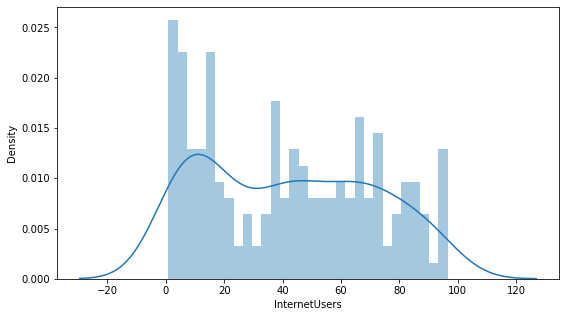

In [33]:
#Distribution:

vis1 = sns.distplot(stats["InternetUsers"], bins=30)

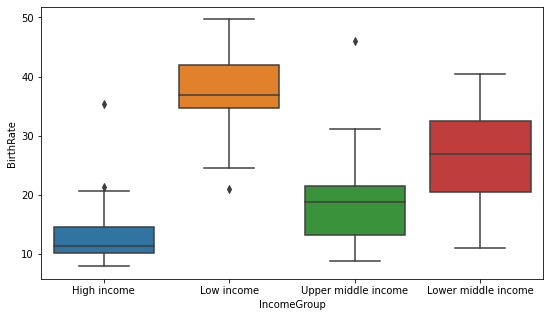

In [34]:
#Boxplots:
vis2 = sns.boxplot(data=stats, x="IncomeGroup", y="BirthRate")

In [35]:
#Seaborn Galery: https://seaborn.pydata.org/examples/index.html

In [36]:
#48. Visualizing with Seaborn: Part 1

In [37]:
import seaborn as sns

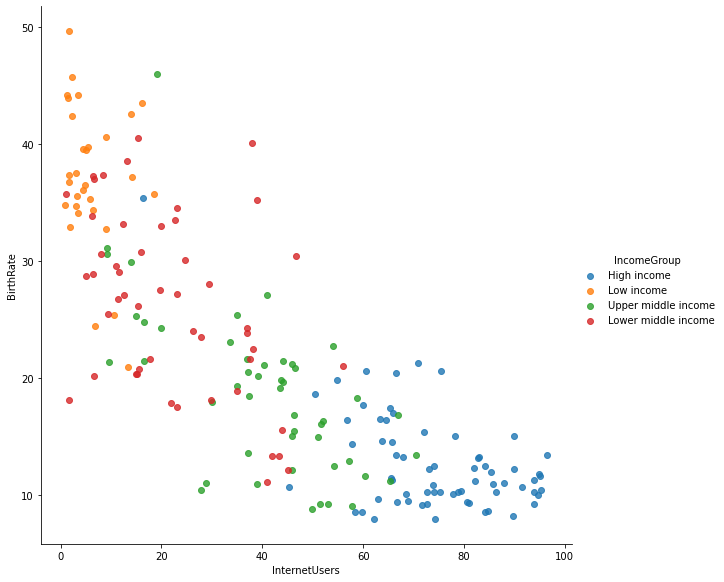

In [46]:
vis3 = sns.lmplot(data=stats, x='InternetUsers', y='BirthRate', fit_reg=False, hue="IncomeGroup", size=8)

In [48]:
#49. Keyword Arguments in Python

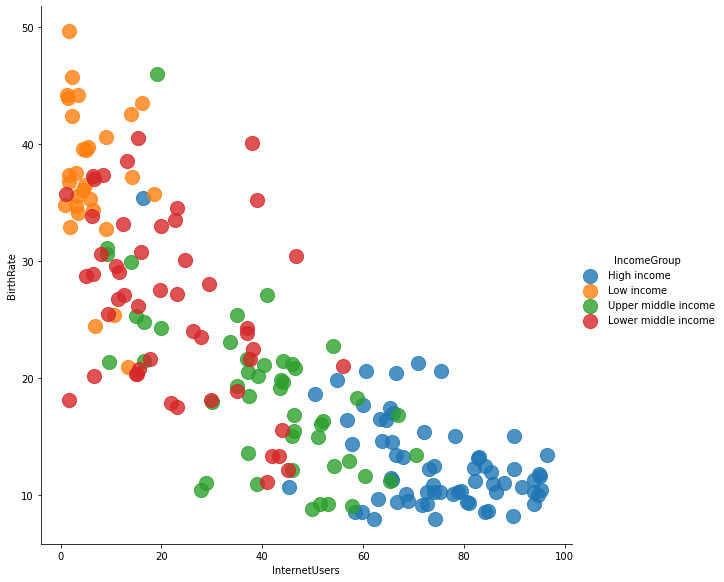

In [56]:
#marker size:

vis3 = sns.lmplot(data=stats, x='InternetUsers', y='BirthRate', fit_reg=False, hue="IncomeGroup", size=8, scatter_kws={"s":200})